# 輸入套件

In [1]:
# 自製模組套件
from preprocess import Data
from backtest import Backtest

# 外部套件
import os
from operators import lag

# 輸入資料

In [2]:
# 檢視可使用資料
os.listdir('data')

['benchmark.csv',
 'close_price.csv',
 'market_size.csv',
 'open_price.csv',
 'vol.csv',
 '單月合併營收創N個月新高_已格式化.csv',
 '單月合併營收年成長(%)連N個月大於零_已格式化.csv',
 '單月合併營收連N個月遞增_已格式化.csv',
 '單月營收年成長(%)_已格式化.csv',
 '收盤價_未還原_已格式化.csv',
 '累計合併營收成長(%)連N個月大於零_已格式化.csv']

In [3]:
# 建立Data物件
month_growth = Data(
    data_name='單月營收年成長(%)_已格式化',
    data_frequency='month',
    market_size_threshold=200
)

# 定義篩選條件、計算公式

In [4]:
from operators import lag

def growth_filter(series):
    '''
    營收YoY負轉正
    '''
    return (
        (lag(series , 1) < 0) &
        (series > 0)
    )

# 加入濾網、篩選條件、計算自定義數值分析

In [5]:
month_growth.add_filter(growth_filter)

篩選條件 - 'growth_filter' 已新增!
市值條件 - '200億以上' 門檻已選擇！
 


# 開始回測

In [6]:
signal_list = [
    month_growth
]

backtesting = Backtest(
    signal_list,
    start_date='2010/1/1',
    end_date='2019/6/30'
)
backtesting.run()

Progress: 100% |#######################| Elapsed Time: 0:00:07 , Time: 0:00:07 


# 分析結果

In [7]:
from analysis import Analysis

backtesting_result = Analysis(backtesting, tax_rate=0, fee_rate=0)
backtesting_result.run()

Progress: 100% |#######################| Elapsed Time: 0:00:35 , Time: 0:00:35 


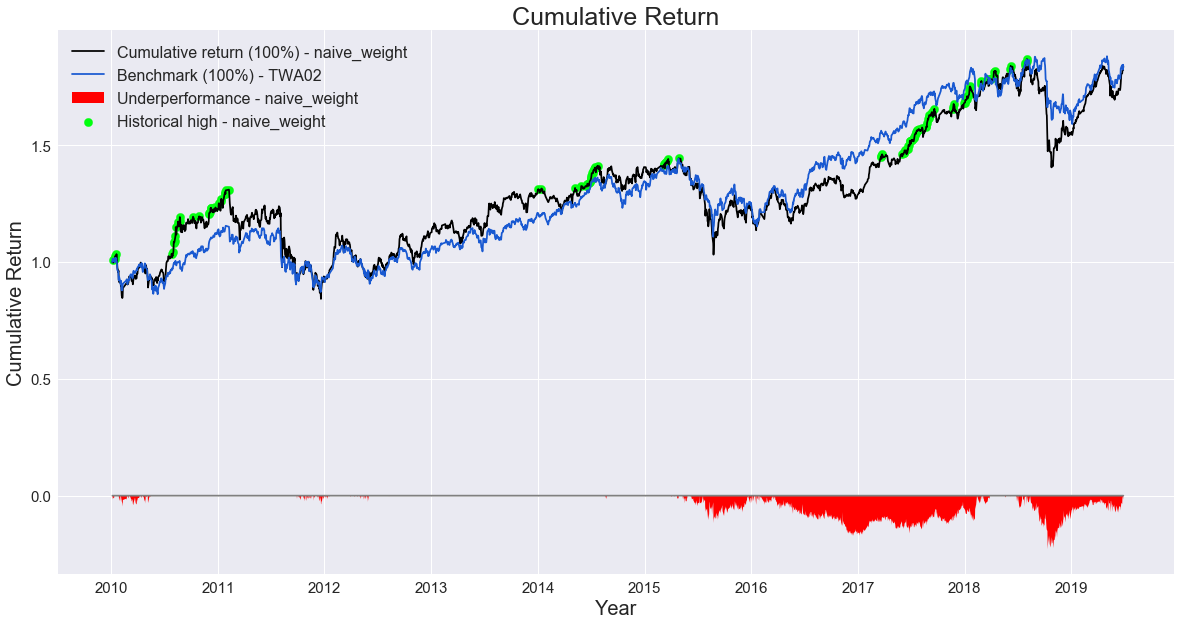

In [8]:
backtesting_result.plot_cumulative_return(weight_method='naive_weight')

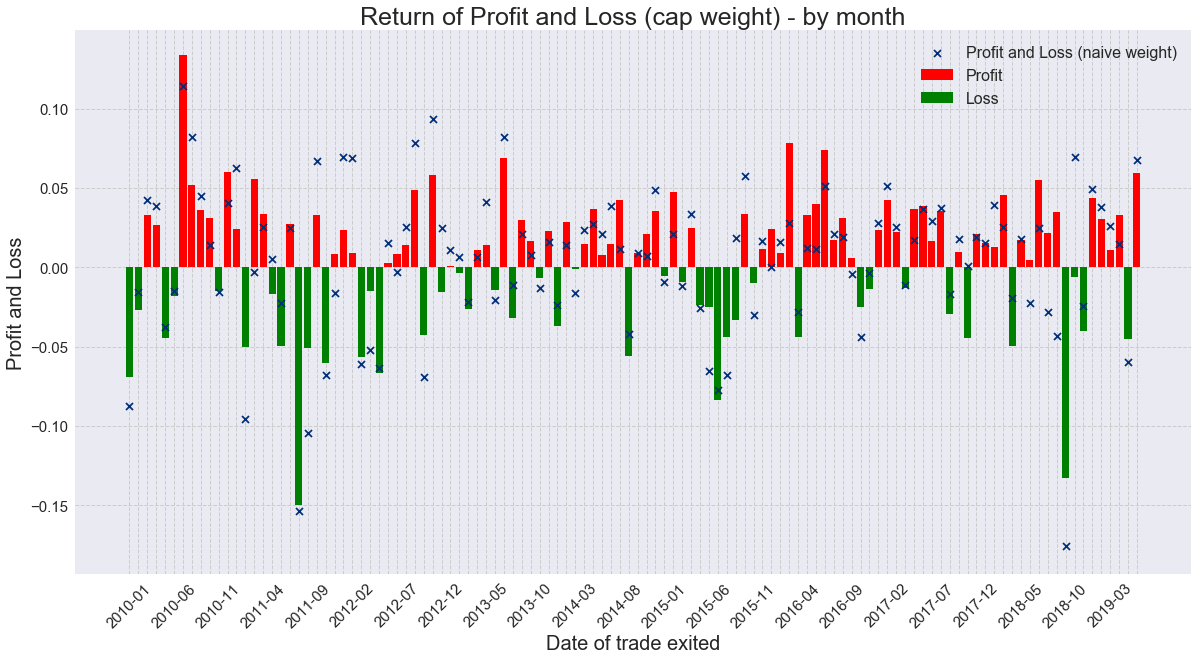

In [9]:
backtesting_result.plot_profit_and_loss(weight_method='cap_weight', frequency='month')

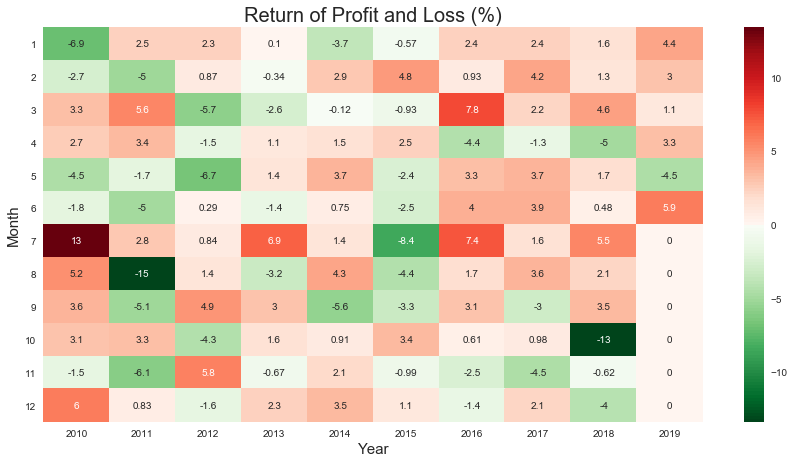

In [10]:
backtesting_result.plot_return_heatmap(weight_method='cap_weight')

In [11]:
backtesting_result.summary()

=========================================  ===========  ==============  ============
Backtesting result                         Benchmark    Naive weight    Cap weight
=========================================  ===========  ==============  ============
Start date                                 2010/01/01   2010/01/01      2010/01/01
End date                                   2019/06/30   2019/06/30      2019/06/30
Duration (years)                           9.5          9.5             9.5
Total trade                                NA           2469            2469
Total entry times                          NA           115             115
Average trade number per entry             NA           21.47           21.47
Average holding days                       NA           30              30
Cumulative return                          83.67%       83.52%          97.15%
Annual return                              7.58%        8.04%           8.81%
CAGR                                      